In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data= pd.read_csv(r'C:\Users\Sayali Desk\OneDrive\Desktop\WeatherData.csv')


In [1]:
data


NameError: name 'data' is not defined

In [12]:
data.shape

(3192, 9)

In [2]:
data.columns

NameError: name 'data' is not defined

In [3]:
data.info()

NameError: name 'data' is not defined

In [16]:
data.isnull().sum()

dt                                              0
LandAverageTemperature                         12
LandAverageTemperatureUncertainty              12
LandMaxTemperature                           1200
LandMaxTemperatureUncertainty                1200
LandMinTemperature                           1200
LandMinTemperatureUncertainty                1200
LandAndOceanAverageTemperature               1200
LandAndOceanAverageTemperatureUncertainty    1200
dtype: int64

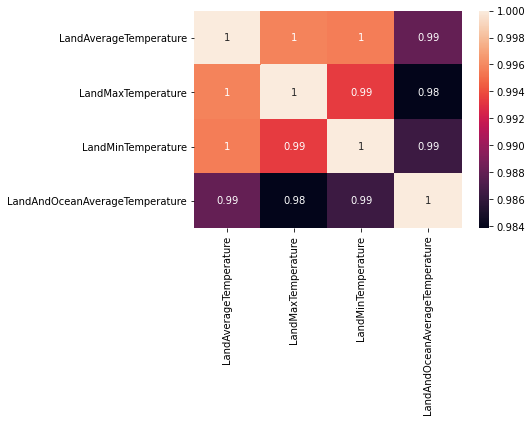

In [64]:
# Quick Correlatin and Visualization
corrMatrix=data.corr()
sns.heatmap(corrMatrix,annot=True)
plt.show()

In [17]:
df=data.copy()
    
# Drop high cardinality columns
df=df.drop(columns=['LandAverageTemperatureUncertainty','LandMaxTemperatureUncertainty','LandMinTemperatureUncertainty','LandAndOceanAverageTemperatureUncertainty'],axis=1)

In [18]:
# convert tempreture 
def conTem(x):
    x=(x*1.8)+32
    return float(x)

#Apply to all columns
df['LandAverageTemperature']=df['LandAverageTemperature'].apply(conTem)
df['LandMaxTemperature']=df['LandMaxTemperature'].apply(conTem)
df['LandMinTemperature']=df['LandMinTemperature'].apply(conTem)
df['LandAndOceanAverageTemperature']=df['LandAndOceanAverageTemperature'].apply(conTem)


In [19]:
# convert column dt to datetime
df["dt"]=pd.to_datetime(df["dt"])
df["Month"]=df["dt"].dt.month
df["Year"]=df["dt"].dt.year
df=df.drop("dt",axis=1)
df=df.drop("Month",axis=1)
df=df[df.Year>=1850]

# Set index to Year column
df=df.set_index(['Year'])

# Drop NaN values
df=df.dropna()
df

,LandAverageTemperature,LandMaxTemperature,LandMinTemperature,LandAndOceanAverageTemperature
Year,,,,
1850,33.3482,46.8356,26.2292,55.0994
1850,37.5278,49.9460,27.8762,56.4584
1850,40.9172,50.6246,28.5710,57.2774
1850,44.9906,55.2812,33.8324,58.4006
1850,50.0072,60.1790,38.8598,59.9126
...,...,...,...,...
2015,58.5590,69.2582,48.2090,63.6602
2015,55.3982,65.9210,44.9582,62.6882
2015,51.4418,61.6100,41.4176,61.3220


In [20]:
data=df.copy()

In [21]:
data.head()

,LandAverageTemperature,LandMaxTemperature,LandMinTemperature,LandAndOceanAverageTemperature
Year,,,,
1850,33.3482,46.8356,26.2292,55.0994
1850,37.5278,49.9460,27.8762,56.4584
1850,40.9172,50.6246,28.5710,57.2774
1850,44.9906,55.2812,33.8324,58.4006
1850,50.0072,60.1790,38.8598,59.9126


In [22]:
data.fillna(0)

,LandAverageTemperature,LandMaxTemperature,LandMinTemperature,LandAndOceanAverageTemperature
Year,,,,
1850,33.3482,46.8356,26.2292,55.0994
1850,37.5278,49.9460,27.8762,56.4584
1850,40.9172,50.6246,28.5710,57.2774
1850,44.9906,55.2812,33.8324,58.4006
1850,50.0072,60.1790,38.8598,59.9126
...,...,...,...,...
2015,58.5590,69.2582,48.2090,63.6602
2015,55.3982,65.9210,44.9582,62.6882
2015,51.4418,61.6100,41.4176,61.3220


In [23]:
x=data.drop('LandAndOceanAverageTemperature',axis=1)

In [24]:
y=data['LandAndOceanAverageTemperature']

In [25]:
x.shape

(1992, 3)

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.25)
x_train

,LandAverageTemperature,LandMaxTemperature,LandMinTemperature
Year,,,
1917,47.3792,57.9668,36.7520
1894,41.7290,52.1366,31.1162
1893,42.6236,53.0618,31.7426
1973,39.0164,49.0928,29.0228
1948,38.2838,48.1658,28.3460
...,...,...,...
1919,56.8148,67.6472,46.1156
1951,52.5884,63.2678,41.6768
1987,49.2620,59.2448,39.3692


In [61]:
y_train

Year
1917    58.8956
1894    57.2648
1893    57.3422
1973    57.4520
1948    56.3720
         ...   
1919    61.6964
1951    61.0844
1987    60.1178
1896    62.1716
1907    55.5944
Name: LandAndOceanAverageTemperature, Length: 1494, dtype: float64

In [28]:
x_test.shape

(498, 3)

In [29]:
y_test.shape

(498,)

In [30]:
x_train.shape

(1494, 3)

In [31]:
y_train.shape

(1494,)

In [35]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)
regressor.coef_

array([ 0.22513036, -0.03526709,  0.10940252])

In [36]:
regressor.intercept_

46.704605067825064

In [37]:
y_train_pred=regressor.predict(x_train)
y_test_pred=regressor.predict(x_test)
y_test_pred.shape

(498,)

In [1]:
r=data.DataFrame({'Actual':y_test, 'predicted':y_test_pred})
r

NameError: name 'data' is not defined

In [48]:
residual_error=abs(y_test-y_test_pred)

In [49]:
residual_error

Year
2000    0.362119
1959    0.319026
1930    0.275128
1858    0.472196
1979    0.013262
          ...   
1976    0.045910
1967    0.103605
1984    0.187738
1947    0.317170
1899    0.304308
Name: LandAndOceanAverageTemperature, Length: 498, dtype: float64

In [50]:
mean_absolute_error=sum(residual_error/len(residual_error))
mean_absolute_error

0.27488513937534675

In [51]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,r2_score

mean_absolute_error(y_test,y_test_pred)

0.2748851393753469

In [52]:
mean_absolute_percentage_error(y_test,y_test_pred)

0.004647414161629118

In [58]:
r2_score(y_test,y_test_pred)

0.9776068697702667

In [60]:
new=[[23.44,44.23,28.32]]
regressor.predict(new)

array([53.52007684])

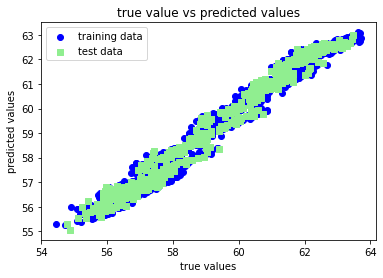

In [59]:

plt.scatter(y_train,y_train_pred,c='blue',marker='o',label="training data")
plt.scatter(y_test,y_test_pred,c='lightgreen',marker='s',label="test data")
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.title('true value vs predicted values')
plt.legend(loc='upper left')
plt.plot()
plt.show()